Linear Regression

In [ ]:
import numpy as np
X = 2* np.random.rand(100,1)
y = 4+3*X +np.random.randn(100,1)

In [9]:
X_b=np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.02039283],
       [3.10007941]])

In [11]:
import numpy as np
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.02039283],
       [10.22055166]])

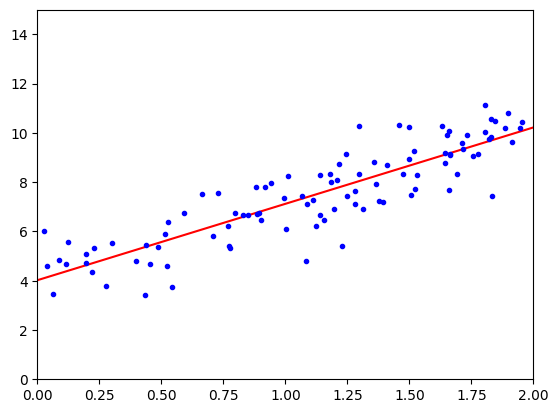

In [13]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict,"r-")
plt.plot(X,y,"b. ")
plt.axis([0,2,0,15])
plt.show()
         

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.02039283]), array([[3.10007941]]))

In [17]:
lin_reg.predict(X_new)

array([[ 4.02039283],
       [10.22055166]])

Batch Gradient Descent

In [19]:
eta =0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradient

In [21]:
theta

array([[4.02039283],
       [3.10007941]])

Stochastic Gradient Descent

In [23]:
n_epochs=50
t0,t1=5,50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients= 2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        

In [25]:
theta

array([[4.0342266 ],
       [3.12007534]])

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)

In [29]:
X[0]

array([1.49719843])

In [31]:
X_poly[0]

array([1.49719843, 2.24160315])

In [33]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)


LinearRegression()

In [35]:
lin_reg.intercept_, lin_reg.coef_

(array([4.3946648]), array([[2.06018537, 0.50963638]]))

For different size of data

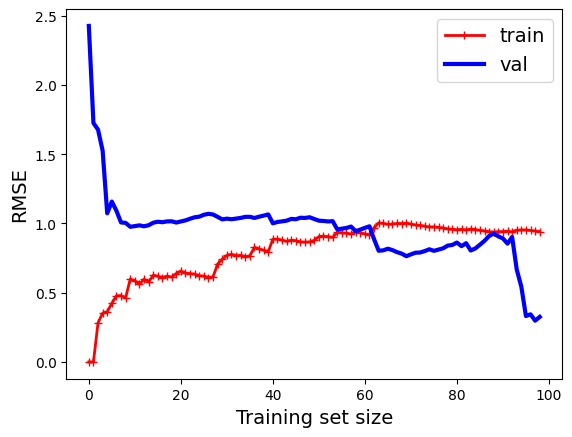

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
 
def plot_learning_curves(model, X, y):
    train_errors = []
    val_errors = []
    for m in range(1, len(X)):
        X_train = X[:m]
        y_train = y[:m]
        X_val = X[m:]
        y_val = y[m:]
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()
 
# Example usage:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

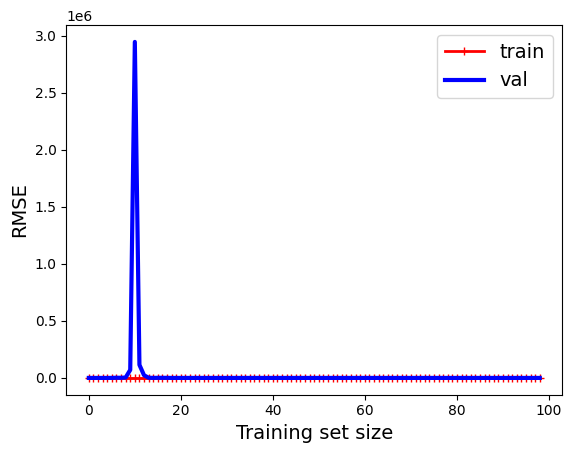

In [41]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),("lin_reg",LinearRegression())])
plot_learning_curves(polynomial_regression, X,y)

In [43]:
# reglarized linear model
# 1. Ridge regrssion

In [45]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.63213292]])

In [56]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.59269484])

In [58]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([8.26093617])